<h1><u>Simple Data exploration with dataset Auto</u></h1>
<h3>Nov 2017</h3>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [3]:
os.getcwd()

'/Users/talbotm/Documents/py_code'

In [8]:
df = pd.read_csv('data/Auto.csv')

In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df.columns
# because there is a ? in the data, this col was parsed as string
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
#df['horsepower'].isnull().sum()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [98]:
df['brand'] = [i[0] for i in df.name.str.split(' ')]

In [103]:
# Origin of car (1. American, 2. European, 3. Japanese)
# https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Auto.html
df.groupby('origin').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,brand
origin,,,,,,,,,
1,248,248,248,248,248,248,248,248,248
2,70,70,70,70,70,70,70,70,70
3,79,79,79,79,79,79,79,79,79


In [118]:
origin_dict = {1: 'American', 2: 'European', 3: 'Japanese' }
f = lambda x: origin_dict[x]
df['origin_name'] = [f(x) for x in df.origin]

In [314]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Checking outliers

In [346]:
from pandas.api.types import is_numeric_dtype

column_is_numeric = [is_numeric_dtype(df[i])  for i in df.columns if i != 'origin']
IQR = np.array((df.iloc[:,column_is_numeric].quantile(0.75) - df.iloc[:,column_is_numeric].quantile(0.25)) * 1.5)
IQR_range = pd.DataFrame()
IQR_range['low'] = df.iloc[:,column_is_numeric].quantile(0.25) - IQR
IQR_range['high'] = df.iloc[:,column_is_numeric].quantile(0.75)+ IQR

preserved_rows = np.ones(df.shape[0],dtype =bool)
for i in IQR_range.index:
    print(i)
    preserved_rows = ((df[i]<IQR_range.loc[i, 'high']) & preserved_rows)
    preserved_rows = ((df[i]>IQR_range.loc[i, 'low']) & preserved_rows)
    
df_no_outlier = df[preserved_rows]
df_no_outlier.describe()     
df[preserved_rows == False].head()


mpg
cylinders
displacement
horsepower
weight
acceleration
year


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,brand,origin_name
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,chevrolet,American
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,plymouth,American
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,pontiac,American
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,amc,American
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340,plymouth,American


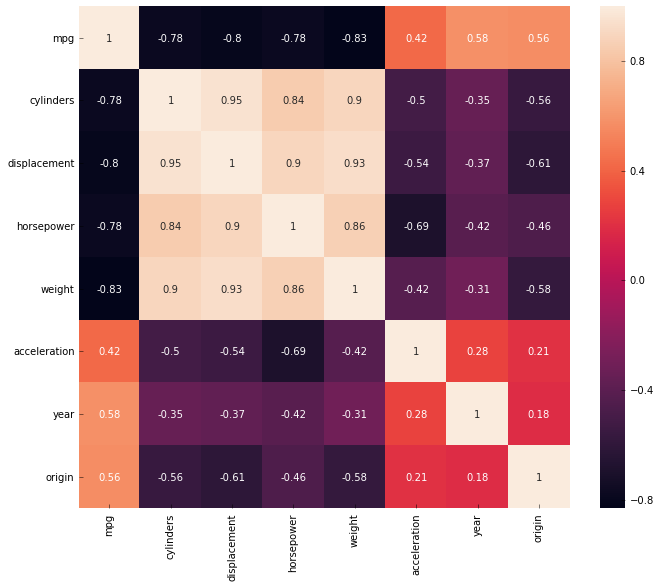

In [240]:
corr = df.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)

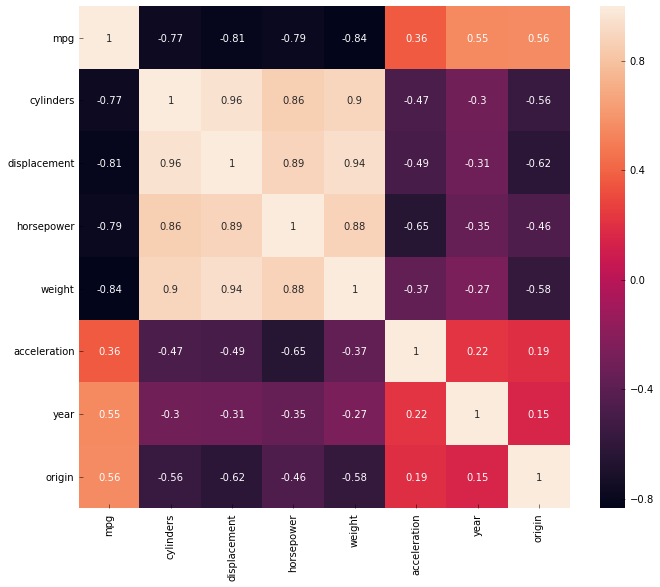

In [349]:
corr = df_no_outlier.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)

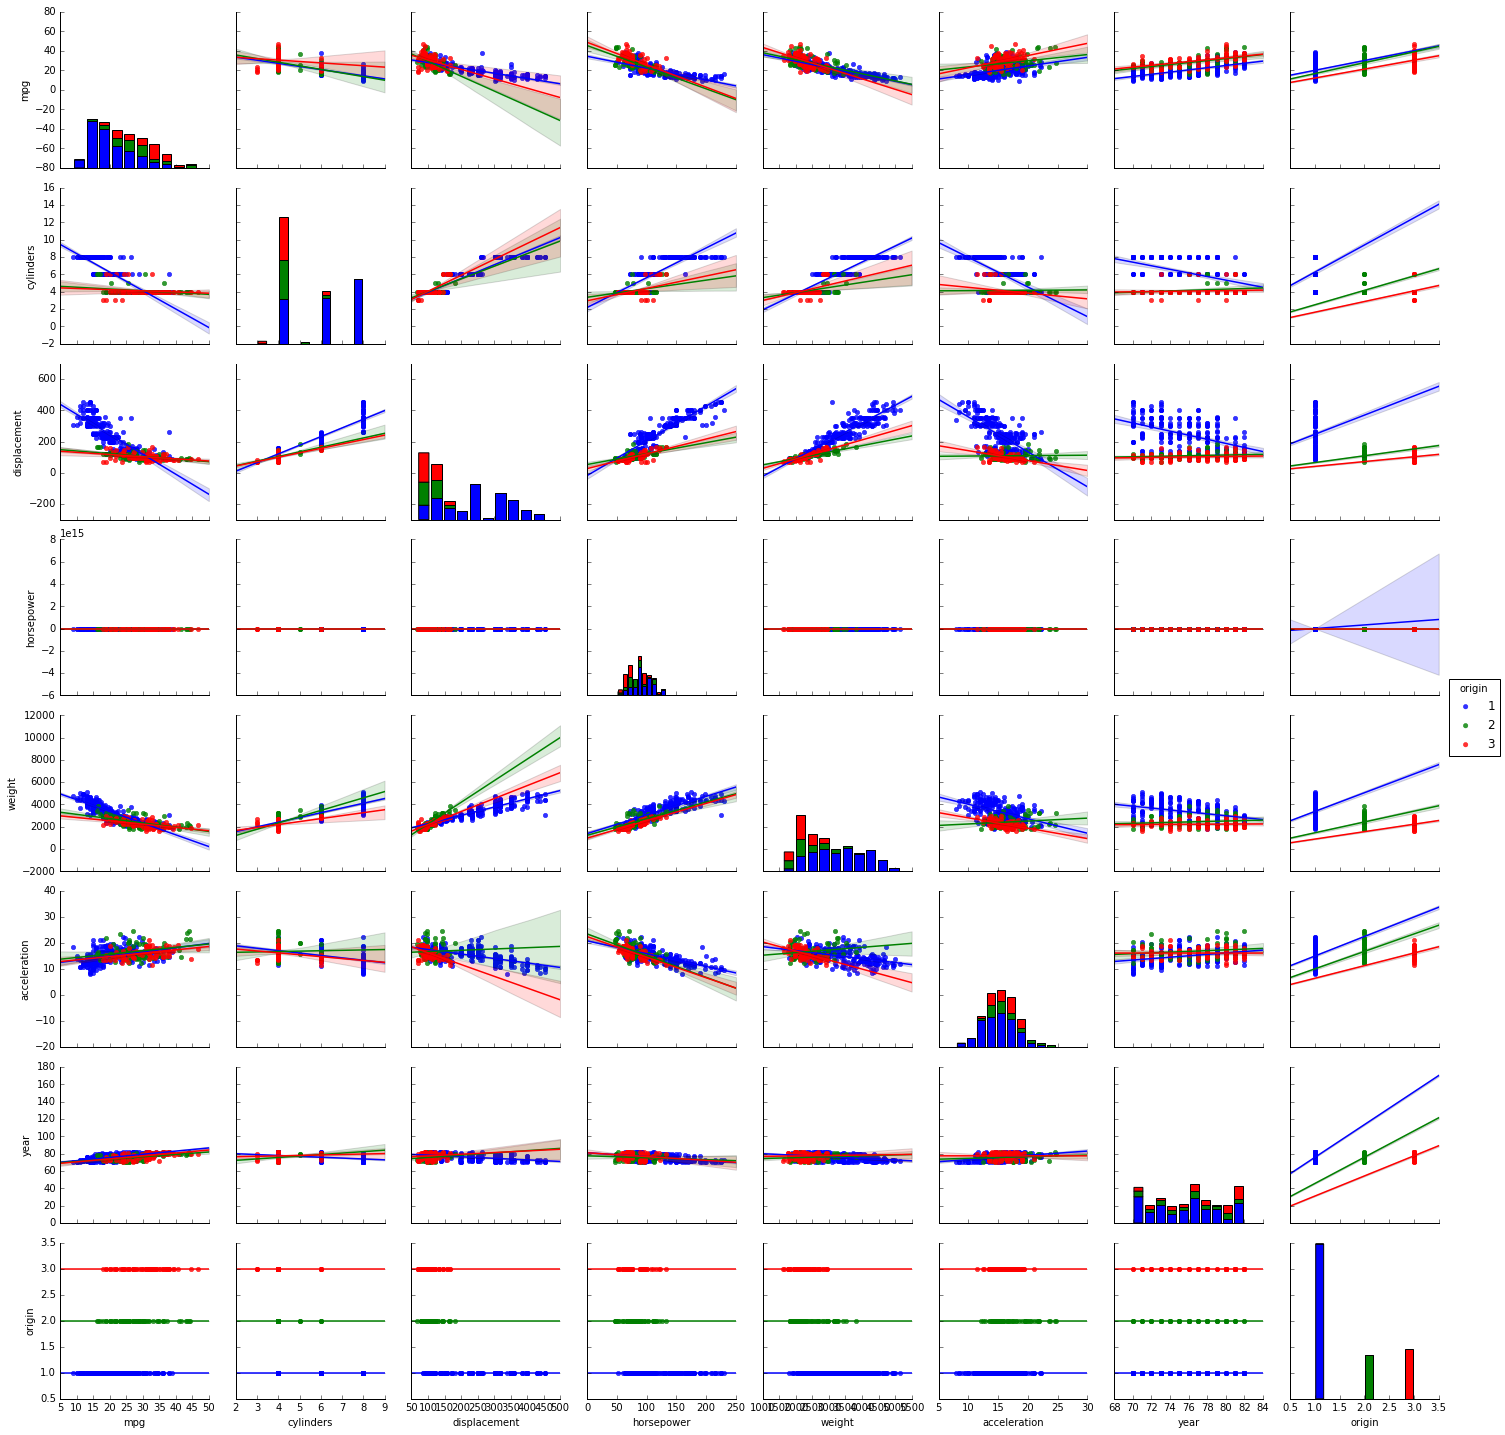

In [233]:
sns.pairplot(df, kind = 'reg', hue = 'origin')

In [166]:
# sns.barplot(x="cylinders", y="acceleration", hue="origin_name", data=df);
# f, ax = plt.subplots(figsize=(11, 9))
# sns.violinplot(x="cylinders", y="mpg", hue="origin", data=df, inner="stick", palette="Set1");

# y = years

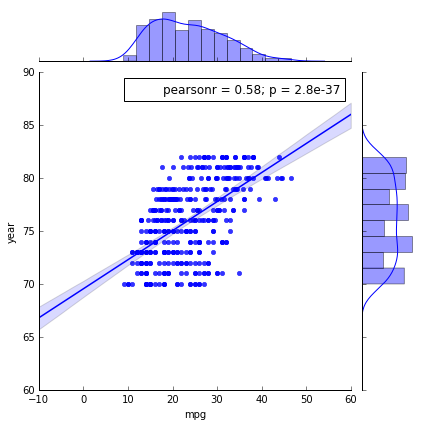

In [176]:
sns.jointplot(x='mpg', y='year', kind='reg', data=df)

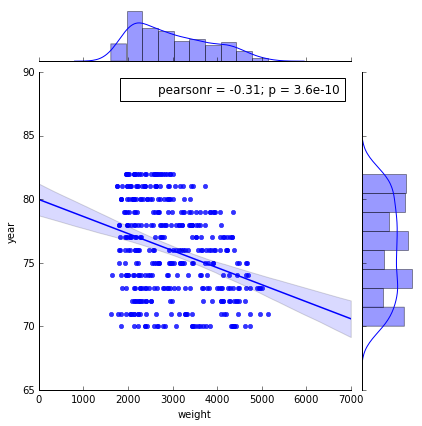

In [177]:
sns.jointplot(x='weight', y='year', kind='reg', data=df)

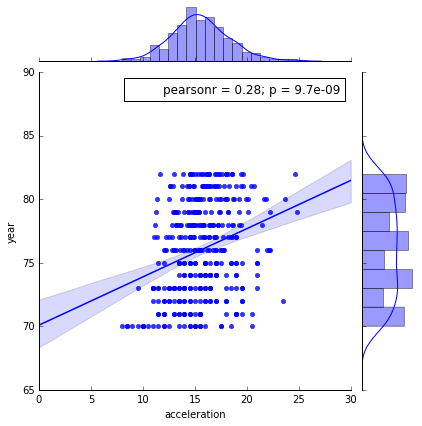

In [179]:
sns.jointplot(x='acceleration', y = 'year', kind='reg', data=df)

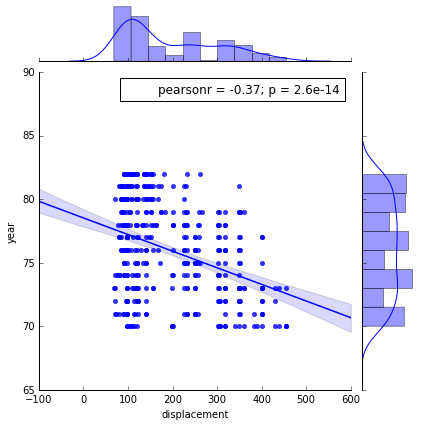

In [180]:
sns.jointplot(x='displacement', y='year', kind='reg', data=df)

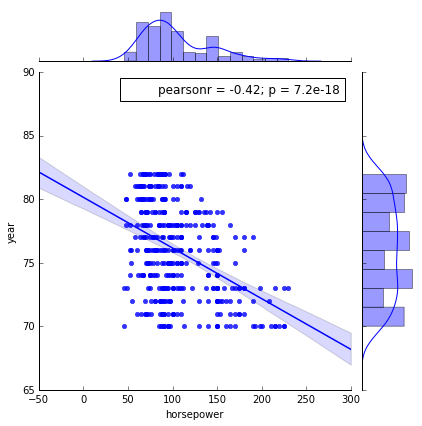

In [232]:
sns.jointplot(x='horsepower', y='year', kind='reg', data=df)

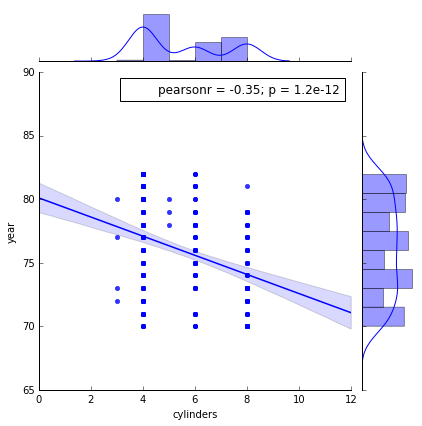

In [348]:
sns.jointplot(x='cylinders', y='year', kind='reg', data=df)